 # Check current working directory

In [ ]:
!cat cryspy.in

[basic]
algo = RS
calc_code = ASE
tot_struc = 5
nstage = 1
njob = 5
jobcmd = zsh
jobfile = job_cryspy

[structure]
atype = Au
nat = 8

[ASE]
ase_python = ase_in.py

[option]


In [5]:
from cryspy.interactive import action
action.clean()
#Type yes to clean data
action.initialize()

[2025-09-10 05:35:12,576][cryspy_init][INFO] 


Start CrySPY 1.4.0b10


[2025-09-10 05:35:12,685][cryspy_init][INFO] # ---------- Library version info
[2025-09-10 05:35:12,687][cryspy_init][INFO] pandas version: 2.3.2
[2025-09-10 05:35:12,692][cryspy_init][INFO] pymatgen version: 2025.6.14
[2025-09-10 05:35:12,700][cryspy_init][INFO] pyxtal version: 1.1.0
[2025-09-10 05:35:12,705][cryspy_init][INFO] # ---------- Read input file, cryspy.in
[2025-09-10 05:35:12,716][write_input][INFO] [basic]
[2025-09-10 05:35:12,721][write_input][INFO] algo = RS
[2025-09-10 05:35:12,722][write_input][INFO] calc_code = ASE
[2025-09-10 05:35:12,723][write_input][INFO] tot_struc = 5
[2025-09-10 05:35:12,725][write_input][INFO] nstage = 1
[2025-09-10 05:35:12,727][write_input][INFO] njob = 5
[2025-09-10 05:35:12,730][write_input][INFO] jobcmd = zsh
[2025-09-10 05:35:12,736][write_input][INFO] jobfile = job_cryspy
[2025-09-10 05:35:12,738][write_input][INFO] 
[2025-09-10 05:35:12,739][write_input][INFO] [str

In [6]:
# ---------- EMT in ASE
from ase.calculators.emt import EMT
import ipywidgets as widgets

calculator = EMT()
widgets.IntProgress()
# ---------- structure optimization
action.restart(
    njob=0,    # njob=0: njob in cryspy.in will be used
    calculator=calculator,
    optimizer='FIRE',    # 'FIRE', 'BFGS' or 'LBFGS'
    symmetry=True,       # default: True
    fmax=0.01,           # default: 0.01
    steps=2000,          # default: 2000
)

# ---------- CHGNet
#from chgnet.model import CHGNetCalculator
#calculator = CHGNetCalculator()


[2025-09-10 05:35:14,716][cryspy_restart][INFO] 


Restart CrySPY 1.4.0b10


[2025-09-10 05:35:14,724][cryspy_restart][INFO] read input, cryspy.in


  0%|          | 0/5 [00:00<?, ?it/s]

[2025-09-10 05:35:43,812][restart_interact][INFO] 
Done all structures!


In [7]:
# ---------- show results
#!cat ./data/cryspy_rslt    # Order of structure optimization completion
!cat ./data/cryspy_rslt_energy_asc    # show energy ascending order
#!sed -n 2,4p ./data/cryspy_rslt    # show i--jth lines
#!tail -n 5 ./data/cryspy_rslt    # show last 5 lines

   Spg_num Spg_sym  Spg_num_opt Spg_sym_opt  E_eV_atom  Magmom   Opt
1      220   I-43d          220       I-43d   0.027968     NaN  done
3       95  P4_322           95      P4_322   0.240231     NaN  done
0       47    Pmmm          221       Pm-3m   0.320086     NaN  done
4       21    C222           21        C222   0.328305     NaN  done
2      168      P6          175        P6/m   0.404833     NaN  done

Number of data: 5
Success: 5
Error: 0
Emin: 0.027967597138453426 eV/atom


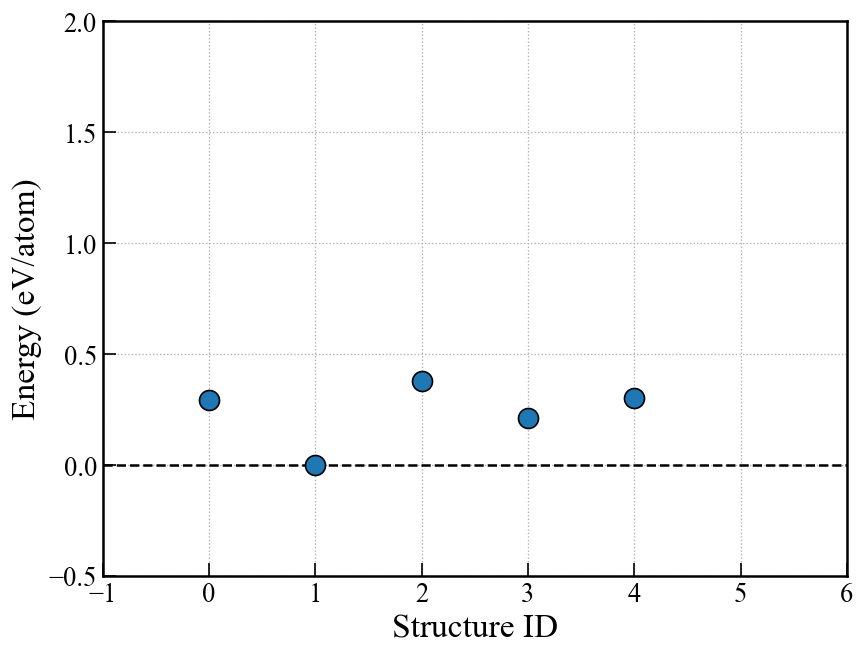

In [9]:
# Structure visualization
from ase.visualize import view
atoms = action.get_atoms('opt', cid=0)    # 'init' or 'opt'
view(atoms, viewer='ngl')    # viewer = 'ngl', 'ase', or 'x3d'
#Energy plot
fig, ax = action.plot_E(
              title=None,
              ymax=2.0,
              ymin=-0.5,
              markersize=12,
              marker_edge_width=1.0,
              marker_edge_color='black',
              alpha=1.0,
          )